In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy import stats
import pandas as pd
import ast
from collections import Counter
from src.Clase_Andres import DataFrameHelper
from src.data_cleaning import (
    convert_to_json, unnest_column, extract_genre_names,
    preprocess_column, extract_tag_names, extract_store_names, extract_main_genre, categorize_metacritic
)

In [3]:
url = '../data/raw/juegos_rawg.csv'
data = pd.read_csv(url)

## Exploracion Inicial

In [4]:
df = data.copy()

In [5]:
helper = DataFrameHelper(df)
print("Informaci√≥n del dataset:")
helper.info()
print("Primeras filas:")
print(helper.head())
print("Valores nulos por columna:")
print(helper.missing_values())

Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5222 entries, 0 to 5221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   slug                5222 non-null   object 
 1   name                5222 non-null   object 
 2   playtime            5222 non-null   int64  
 3   platforms           5222 non-null   object 
 4   stores              5198 non-null   object 
 5   released            5222 non-null   object 
 6   tba                 5222 non-null   bool   
 7   background_image    5221 non-null   object 
 8   rating              5222 non-null   float64
 9   rating_top          5222 non-null   int64  
 10  ratings             5222 non-null   object 
 11  ratings_count       5222 non-null   int64  
 12  reviews_text_count  5222 non-null   int64  
 13  added               5222 non-null   int64  
 14  added_by_status     5111 non-null   object 
 15  metacritic          1894 non-

In [6]:
df.tail()

slug                           name  playtime  \
5217          the-otterman-empire            The Otterman Empire         0   
5218  jacks-or-better-video-poker  Jacks or Better - Video Poker         0   
5219    jumanji-the-curse-returns     Jumanji: The Curse Returns         0   
5220                    avocuddle                      AvoCuddle         0   
5221                    tarzan-vr                      Tarzan VR         0   

                                              platforms  \
5217  [{'platform': {'id': 4, 'name': 'PC', 'slug': ...   
5218  [{'platform': {'id': 4, 'name': 'PC', 'slug': ...   
5219  [{'platform': {'id': 4, 'name': 'PC', 'slug': ...   
5220  [{'platform': {'id': 4, 'name': 'PC', 'slug': ...   
5221  [{'platform': {'id': 4, 'name': 'PC', 'slug': ...   

                                                 stores    released    tba  \
5217  [{'store': {'id': 1, 'name': 'Steam', 'slug': ...  2020-07-02  False   
5218  [{'store': {'id': 1, 'name': 'Steam', 'slug': ...  2020-06-12  False   
5219  [{'store': {'id': 1, 'name': 'Steam', 'slug': ...  2021-09-01   True   
5220  [{'store': {'id': 1, 'name': 'Steam', 'slug': ...  2019-07-12  False   
5221  [{'store': {'id': 1, 'name': 'Steam', 'slug': ...  2020-11-17  False   

                                       background_image  rating  rating_top  \
5217  https://media.rawg.io/media/screenshots/019/01...     0.0           0   
5218  https://media.rawg.io/media/screenshots/0e7/0e...     0.0           0   
5219  https://media.rawg.io/media/screenshots/eea/ee...     0.0           0   
5220  https://media.rawg.io/media/screenshots/df2/df...     0.0           0   
5221  https://media.rawg.io/media/games/64a/64a11dd3...     0.0           0   

      ...                                               tags  \
5217  ...  [{'id': 31, 'name': 'Singleplayer', 'slug': 's...   
5218  ...  [{'id': 31, 'name': 'Singleplayer', 'slug': 's...   
5219  ...  [{'id': 31, 'name': 'Singleplayer', 'slug': 's...   
5220  ...  [{'id': 31, 'name': 'Singleplayer', 'slug': 's...   
5221  ...  [{'id': 31, 'name': 'Singleplayer', 'slug': 's...   

                                            esrb_rating  user_game  \
5217  {'id': 1, 'name': 'Everyone', 'slug': 'everyon...        NaN   
5218  {'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...        NaN   
5219  {'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...        NaN   
5220  {'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...        NaN   
5221  {'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...        NaN   

      reviews_count saturated_color  dominant_color  \
5217              0          0f0f0f          0f0f0f   
5218              0          0f0f0f          0f0f0f   
5219              0          0f0f0f          0f0f0f   
5220              0          0f0f0f          0f0f0f   
5221              0          0f0f0f          0f0f0f   

                                      short_screenshots  \
5217  [{'id': -1, 'image': 'https://media.rawg.io/me...   
5218  [{'id': -1, 'image': 'https://media.rawg.io/me...   
5219  [{'id': -1, 'image': 'https://media.rawg.io/me...   
5220  [{'id': -1, 'image': 'https://media.rawg.io/me...   
5221  [{'id': -1, 'image': 'https://media.rawg.io/me...   

                                       parent_platforms  \
5217  [{'platform': {'id': 1, 'name': 'PC', 'slug': ...   
5218  [{'platform': {'id': 1, 'name': 'PC', 'slug': ...   
5219  [{'platform': {'id': 1, 'name': 'PC', 'slug': ...   
5220  [{'platform': {'id': 1, 'name': 'PC', 'slug': ...   
5221  [{'platform': {'id': 1, 'name': 'PC', 'slug': ...   

                                                 genres  community_rating  
5217  [{'id': 40, 'name': 'Casual', 'slug': 'casual'...               0.0  
5218  [{'id': 40, 'name': 'Casual', 'slug': 'casual'...               0.0  
5219  [{'id': 3, 'name': 'Adventure', 'slug': 'adven...               0.0  
5220  [{'id': 51, 'name': 'Indie', 'slug': 'indie'},...               0.0  
5221  [{'id': 3, 'name': 'Adventur

In [7]:
df.shape

(5222, 31)

# Eliminar colummnas irrelevantes

In [8]:
df.drop(columns=['score', 'clip', 'user_game', 'background_image', 'short_screenshots', 
                   'saturated_color', 'dominant_color', 'parent_platforms', 'platforms','tba', 'community_rating', 'esrb_rating'],inplace=True)


In [9]:
print(df.columns)

Index(['slug', 'name', 'playtime', 'stores', 'released', 'rating',
       'rating_top', 'ratings', 'ratings_count', 'reviews_text_count', 'added',
       'added_by_status', 'metacritic', 'suggestions_count', 'updated', 'id',
       'tags', 'reviews_count', 'genres'],
      dtype='object')


| Columna              | Descripci√≥n                                                                                     | Observaciones                                                                                               |
|----------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------
| slug                | Identificador √∫nico en formato texto para cada juego.                                           | Es √∫til para identificar juegos de forma √∫nica, pero no es legible para el usuario.                        |
| name                | Nombre completo del juego.                                                                      | Informaci√≥n principal y visible para el usuario.                                                           |
| playtime            | Tiempo promedio de juego en horas.                                                              | Puede contener valores bajos o nulos para juegos menos populares.                                          |
| stores              | Tiendas donde el juego est√° disponible, en formato JSON.                                        | Requiere desanidar para obtener datos como nombres de tiendas o URLs espec√≠ficas.                          |
| released            | Fecha de lanzamiento del juego.                                                                 | Puede contener valores nulos para juegos a√∫n no lanzados.                                                  |
| rating              | Calificaci√≥n promedio del juego (en base a opiniones de usuarios).                              | Es una m√©trica importante de calidad, pero debe analizarse junto a `ratings_count` para contexto.          |
| rating_top          | Calificaci√≥n m√°xima disponible (e.g., 5 estrellas).                                             | Puede ser redundante, pero √∫til para verificar si un juego alcanza la calificaci√≥n m√°xima.                 |
| ratings             | Detalle de calificaciones divididas en varias categor√≠as, en formato JSON.                      | Es necesario desanidar para an√°lisis detallado, como "exceptional", "recommended", etc.                    |
| ratings_count       | N√∫mero total de calificaciones recibidas.                                                       | Complementa a `rating` y da contexto sobre la cantidad de usuarios que calificaron.                        |
| reviews_text_count  | N√∫mero de rese√±as que incluyen texto.                                                           | √ötil para an√°lisis de sentimientos o revisiones detalladas.                                                |
| added               | Total de veces que el juego fue agregado a listas de usuarios.                                  | Es una m√©trica de popularidad que puede correlacionar con `playtime` o `ratings_count`.                    |
| added_by_status     | Detalles sobre c√≥mo los usuarios clasificaron el juego, en formato JSON.                        | Requiere procesamiento adicional para dividir categor√≠as como "owned", "beaten", etc.                      |
| metacritic          | Puntuaci√≥n promedio en Metacritic.                                                              | M√©trica externa de calidad, puede no estar presente para algunos juegos.                                   |
| suggestions_count   | N√∫mero de juegos sugeridos similares.                                                           | Puede indicar qu√© tan conectado est√° un juego con otros en t√©rminos de g√©nero o popularidad.               |
| updated             | √öltima fecha de actualizaci√≥n de los datos del juego.                                           | Indica la frescura de los datos, especialmente relevante para juegos en desarrollo o con DLC recientes.    |
| id                  | Identificador √∫nico del juego.                                                                  | Esencial para uniones o referencias cruzadas con otras tablas.                                             |
| tags                | Etiquetas asociadas al juego, en formato JSON.                                                  | Requiere desanidar para obtener insights como caracter√≠sticas o tem√°ticas comunes.                         |
| reviews_count       | N√∫mero total de rese√±as.                                                                        | Complementa `reviews_text_count`, puede incluir rese√±as con y sin texto.                                   |
| genres              | G√©neros a los que pertenece el juego, en formato JSON.                                          | Necesita desanidarse para obtener informaci√≥n granular sobre g√©neros.                                      |


# Aplicamos un convert json a las columnas

In [10]:
from src.data_cleaning import convert_to_json
df['stores'] = df['stores'].apply(convert_to_json)
df['ratings'] = df['ratings'].apply(convert_to_json)
df['tags'] = df['tags'].apply(convert_to_json)
df['genres'] = df['genres'].apply(convert_to_json)

# Tratamiento de los datos

## Valores de generos, nombre de generos

In [11]:
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df['release_year'] = df['released'].dt.year

In [12]:
from src.data_cleaning import extract_main_genre
df['main_genre'] = df['genres'].apply(extract_main_genre)


In [13]:
df["genre_names"] = df["genres"].apply(extract_genre_names)
df["tags_names"] = df["tags"].apply(extract_tag_names)
df["store_names"] = df["stores"].apply(extract_store_names)

# Imputamos valores de Metacritic

In [14]:
median_metacritic = df.groupby(['release_year', 'main_genre'])['metacritic'].median()

def impute_metacritic(row):
    if pd.isna(row['metacritic']):
        return median_metacritic.get((row['release_year'], row['main_genre']), df['metacritic'].median())
    return row['metacritic']

df['metacritic'] = df.apply(impute_metacritic, axis=1)

global_median_metacritic = df['metacritic'].median()
df['metacritic'].fillna(global_median_metacritic, inplace=True)

C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3099579524.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['metacritic'].fillna(global_median_metacritic, inplace=True)


### Creamos metacritic category

In [15]:
from src.data_cleaning import categorize_metacritic
df["metacritic_category"] = df["metacritic"].apply(categorize_metacritic)

## Convertimos colummnas de fecha a formato datetime

In [16]:
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df['updated'] = pd.to_datetime(df['updated'], errors='coerce')

## Desanidamos la colummnas

In [17]:
from src.data_cleaning import unnest_column

df_ratings = unnest_column(df, 'ratings')
df_tags = unnest_column(df, 'tags')
df_stores = unnest_column(df, 'stores')
df_genres = unnest_column(df, 'genres')

#### Eliminar valores Originales y entre otras que no hacen falta

In [18]:
df.drop(columns=['stores', 'ratings', 'tags', 'genres', 'id', 'added_by_status', "genre_names", "store_names", "tags_names"], inplace=True)

## Optimizamos la memoria

In [19]:
df['ratings_count'] = df['ratings_count'].astype('int32')
df['reviews_count'] = df['reviews_count'].astype('int32')
df['suggestions_count'] = df['suggestions_count'].astype('int32')
df['added'] = df['added'].astype('int32')
df['reviews_text_count'] = df['reviews_text_count'].astype('int32')

df['rating'] = df['rating'].astype('float32')
df['metacritic'] = df['metacritic'].astype('float32')

df['metacritic_category'] = df['metacritic_category'].astype('category')

# Manejo de valores nulos

In [20]:
df.fillna({
    'metacritic': df['metacritic'].median(),
    'rating': df['rating'].median(),
    'released': df['released'].min(),
    'updated': df['updated'].max(),
}, inplace=True)


## Categorizamos metacrtic

In [21]:
df['metacritic_category'] = df['metacritic'].apply(categorize_metacritic)

## Hcaemos un describe

In [22]:
df.describe()

playtime                       released       rating   rating_top  \
count  5222.000000                           5222  5222.000000  5222.000000   
mean      3.311949  2018-02-12 00:24:49.084641792     2.049284     2.271735   
min       0.000000            2000-02-29 00:00:00     0.000000     0.000000   
25%       1.000000            2016-05-13 00:00:00     0.000000     0.000000   
50%       2.000000            2018-06-01 00:00:00     2.830000     3.000000   
75%       4.000000            2020-06-12 00:00:00     3.580000     4.000000   
max     186.000000            2024-12-31 00:00:00     4.710000     5.000000   
std       6.309711                            NaN     1.725586     1.902700   

       ratings_count  reviews_text_count         added   metacritic  \
count    5222.000000         5222.000000   5222.000000  5222.000000   
mean      140.648028            1.267331    900.679433    74.220322   
min         0.000000            0.000000      0.000000    15.000000   
25%         2.000000            0.000000     29.000000    72.000000   
50%        11.000000            0.000000    156.000000    74.000000   
75%        70.000000            1.000000    843.000000    77.000000   
max      6965.000000           79.000000  21632.000000    96.000000   
std       418.082248            4.150511   1905.044868     6.649771   

       suggestions_count                        updated  reviews_count  \
count        5222.000000                           5222    5222.000000   
mean          343.419571  2023-04-13 13:04:19.299119104     142.556492   
min             0.000000            2019-01-09 12:41:06       0.000000   
25%           215.000000     2022-01-19 04:31:05.500000       2.000000   
50%           324.000000            2023-12-20 12:58:54      12.000000   
75%           456.000000  2024-11-08 17:25:59.750000128      71.000000   
max          1719.000000            2024-12-25 08:54:56    7073.000000   
std           175.648483                            NaN     423.320583   

       release_year  
count   5222.000000  
mean    2017.602834  
min     2000.000000  
25%     2016.000000  
50%     2018.000000  
75%     2020.000000  
max     2024.000000  
std        3.364764

## Detectar y manejar outliers en `playtime`, `ratings_count`, `reviews_count`
- Aplicar m√©todo de IQR para detecci√≥n de outliers

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

outlier_columns = ['playtime', 'ratings_count', 'reviews_count']
for col in outlier_columns:
    df = remove_outliers(df, col)

In [24]:
df.to_csv("Juegorawg_limpio.csv", index=False)

# Analisis Exploratorio

In [25]:
df.describe(include='all')

slug       name     playtime                       released  \
count        3768       3768  3768.000000                           3768   
unique       3768       3768          NaN                            NaN   
top     tarzan-vr  Tarzan VR          NaN                            NaN   
freq            1          1          NaN                            NaN   
mean          NaN        NaN     2.039544  2018-08-30 05:20:15.286624256   
min           NaN        NaN     0.000000            2000-06-26 00:00:00   
25%           NaN        NaN     0.000000            2016-11-30 18:00:00   
50%           NaN        NaN     2.000000            2018-10-08 12:00:00   
75%           NaN        NaN     3.000000            2020-08-11 06:00:00   
max           NaN        NaN     8.000000            2024-12-31 00:00:00   
std           NaN        NaN     1.842419                            NaN   

             rating   rating_top  ratings_count  reviews_text_count  \
count   3768.000000  3768.000000    3768.000000         3768.000000   
unique          NaN          NaN            NaN                 NaN   
top             NaN          NaN            NaN                 NaN   
freq            NaN          NaN            NaN                 NaN   
mean       1.506927     1.711783      12.183652            0.183386   
min        0.000000     0.000000       0.000000            0.000000   
25%        0.000000     0.000000       1.000000            0.000000   
50%        0.000000     1.000000       4.500000            0.000000   
75%        3.200000     4.000000      17.000000            0.000000   
max        4.710000     5.000000      68.000000            8.000000   
std        1.652357     1.856477      16.267515            0.525000   

              added   metacritic  suggestions_count  \
count   3768.000000  3768.000000        3768.000000   
unique          NaN          NaN                NaN   
top             NaN          NaN                NaN   
freq            NaN          NaN                NaN   
mean     188.545913    73.345276         307.114384   
min        0.000000    15.000000           0.000000   
25%       16.000000    72.000000         193.000000   
50%       74.000000    74.000000         288.500000   
75%      235.000000    76.000000         411.000000   
max     2182.000000    92.000000        1354.000000   
std      274.352496     5.988902         154.421919   

                              updated  reviews_count  release_year main_genre  \
count                            3768    3768.000000   3768.000000       3768   
unique                            NaN            NaN           NaN         15   
top                               NaN            NaN           NaN      Indie   
freq                              NaN            NaN           NaN       1525   
mean    2022-09-25 16:56:58.692675072      12.461253   2018.149947        NaN   
min               2019-01-09 12:41:06       0.000000   2000.000000        NaN   
25%     2020-12-16 14:58:33.750000128       1.000000   2016.000000        NaN   
50%        2023-04-24 22:00:09.500000       5.000000   2018.000000        NaN   
75%     2024-05-14 16:26:29.249999872      18.000000   2020.000000        NaN   
max               2024-12-24 23:49:58      68.000000   2024.000000        NaN   
std                               NaN      16.578444      2.804216        NaN   

       metacritic_category  
count                 3768  
unique                   3  
top                  Media  
freq                  3377  
mean                   NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN  
std                    NaN

## Variables Numericas

In [26]:
numeric_cols = ['playtime', 'ratings_count', 'reviews_count', 'metacritic', 'rating']

### Prueba de normalidad

In [27]:
from scipy.stats import shapiro, normaltest, anderson
from collections import Counter
import numpy as np

In [ ]:
def normality_tests(column):
    print(f"\nPruebas de normalidad para {column}:")
 
    stat, p_value = stats.shapiro(df[column].dropna())
    print(f"Shapiro-Wilk test: Stat={stat:.4f}, p-value={p_value:.4f}")
    
  
    stat, p_value = stats.kstest(df[column].dropna(), 'norm')
    print(f"Kolmogorov-Smirnov test: Stat={stat:.4f}, p-value={p_value:.4f}")
    
    
    result = stats.anderson(df[column].dropna(), dist='norm')
    print(f"Anderson-Darling test: Stat={result.statistic:.4f}")
    print("Critical values:", result.critical_values)
    print("Significance levels:", result.significance_level)


In [29]:
normality_tests('rating')
normality_tests('metacritic')
normality_tests('playtime')


Pruebas de normalidad para rating:
Shapiro-Wilk test: Stat=0.7508, p-value=0.0000
Kolmogorov-Smirnov test: Stat=0.5000, p-value=0.0000
Anderson-Darling test: Stat=436.8899
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Pruebas de normalidad para metacritic:
Shapiro-Wilk test: Stat=0.7841, p-value=0.0000
Kolmogorov-Smirnov test: Stat=1.0000, p-value=0.0000
Anderson-Darling test: Stat=206.8780
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Pruebas de normalidad para playtime:
Shapiro-Wilk test: Stat=0.8960, p-value=0.0000
Kolmogorov-Smirnov test: Stat=0.5754, p-value=0.0000
Anderson-Darling test: Stat=121.8543
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]


# Pruebas de Normalidad

## Rating
- **Shapiro-Wilk test:** p-value = 0.0000 ‚Üí Rechazamos la hip√≥tesis nula de normalidad.
- **Kolmogorov-Smirnov test:** p-value = 0.0000 ‚Üí Tambi√©n rechaza la normalidad.
- **Anderson-Darling test:** El estad√≠stico es muy alto en comparaci√≥n con los valores cr√≠ticos, lo que confirma que la variable no sigue una distribuci√≥n normal.

## Metacritic
- **Shapiro-Wilk test:** p-value = 0.0000 ‚Üí Rechazamos la normalidad.
- **Kolmogorov-Smirnov test:** p-value = 0.0000 ‚Üí Tambi√©n indica una distribuci√≥n no normal.
- **Anderson-Darling test:** El estad√≠stico es extremadamente alto, confirmando que la variable no es normal.

## Playtime
- **Shapiro-Wilk test:** p-value = 0.0000 ‚Üí No es normal.
- **Kolmogorov-Smirnov test:** p-value = 0.0000 ‚Üí Rechazamos la normalidad.
- **Anderson-Darling test:** Nuevamente, el estad√≠stico es mucho mayor que los valores cr√≠ticos, lo que sugiere que la variable no sigue una distribuci√≥n normal.

## Conclusi√≥n
Todas las pruebas de normalidad confirman que **ninguna de las variables analizadas sigue una distribuci√≥n normal**, lo que sugiere que se deben considerar **pruebas estad√≠sticas no param√©tricas** para an√°lisis posteriores.


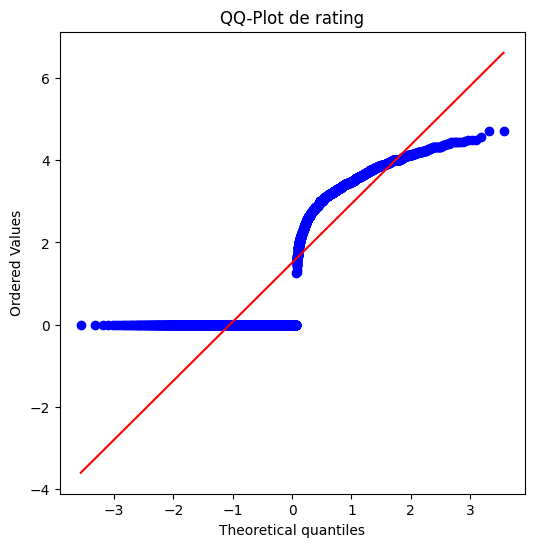

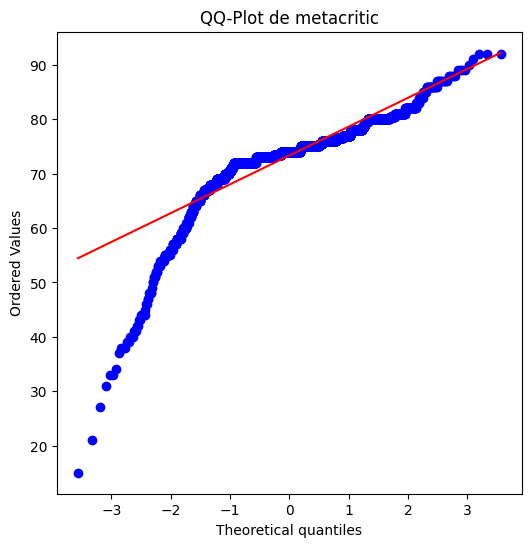

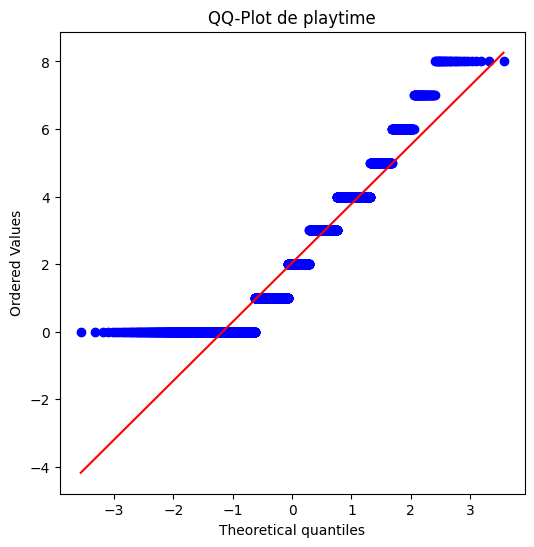

In [30]:
def qq_plot(column):
    plt.figure(figsize=(6,6))
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column}")
    plt.show()

qq_plot('rating')
qq_plot('metacritic')
qq_plot('playtime')


## Interpretaci√≥n
Los QQ-Plots generados muestran c√≥mo se distribuyen los valores de las siguientes variables en comparaci√≥n con una distribuci√≥n normal:

1. **Rating**
2. **Metacritic**
3. **Playtime**

Cada punto en el gr√°fico representa un cuantil de los datos observados contra el cuantil correspondiente de la distribuci√≥n normal te√≥rica. 

### ¬øC√≥mo interpretar los resultados?
- **Si los puntos siguen una l√≠nea recta (diagonal roja en algunos casos), la variable sigue una distribuci√≥n normal.**
- **Si los puntos se desv√≠an significativamente de la l√≠nea recta, la variable no es normal.**
- **Curvaturas en los extremos indican colas m√°s pesadas o m√°s ligeras que una normal.**
- **Si los puntos presentan una forma en "S", la variable puede tener una distribuci√≥n sesgada.**

Dado que las pruebas de normalidad previas rechazaron la hip√≥tesis de normalidad, es probable que en estos gr√°ficos los puntos **no sigan una l√≠nea recta**, confirmando que las variables **rating, metacritic y playtime no siguen una distribuci√≥n normal**.

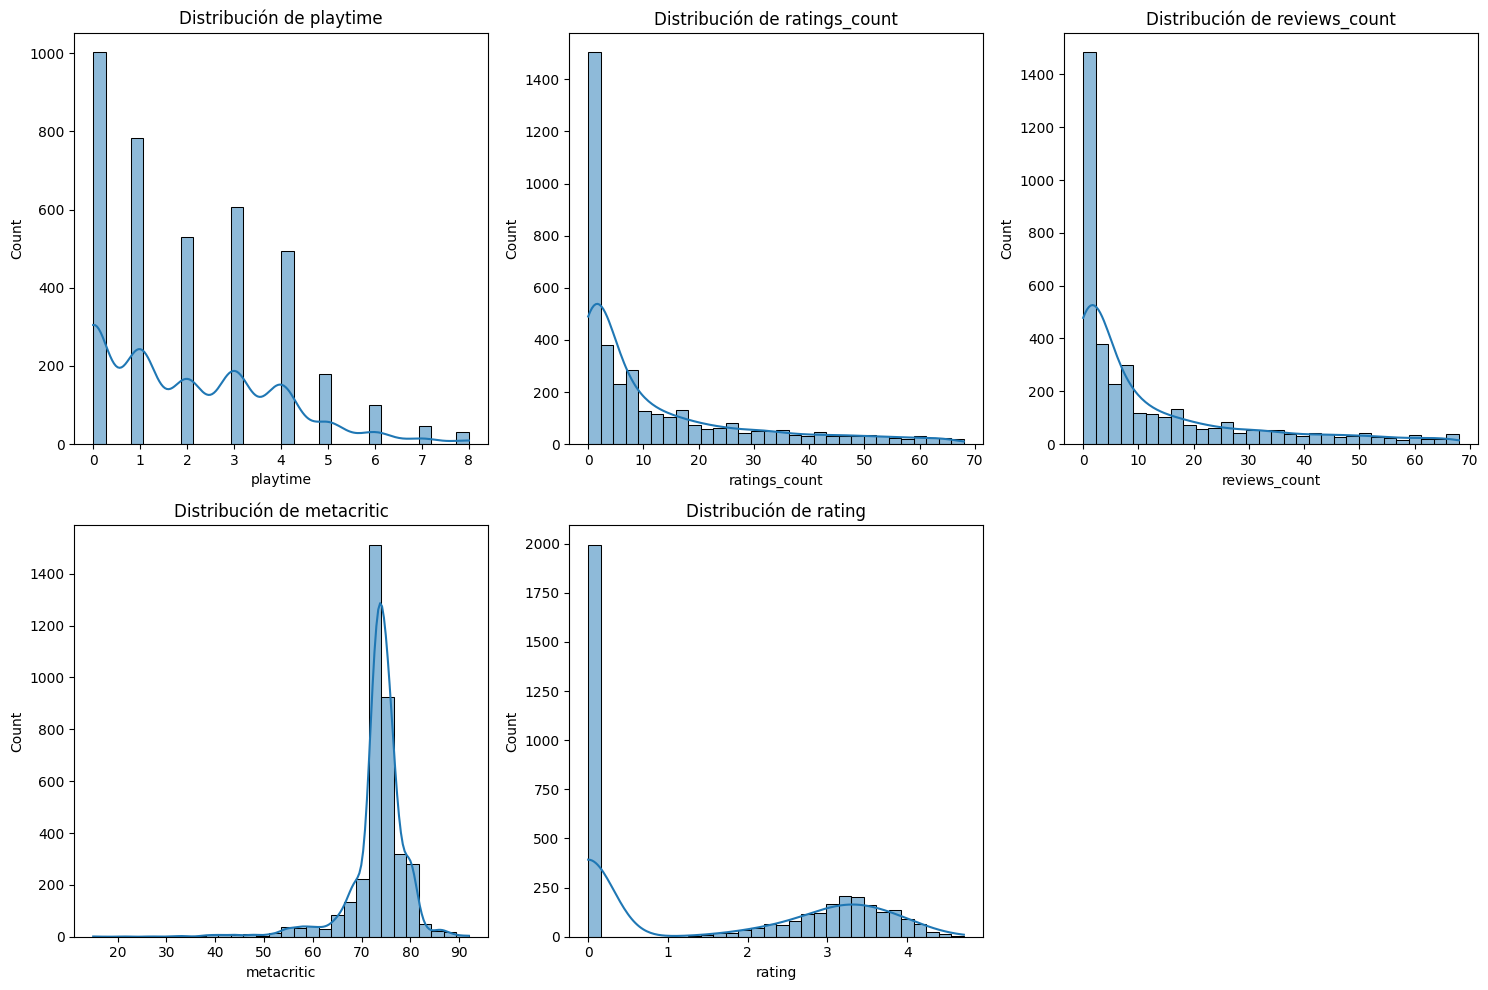

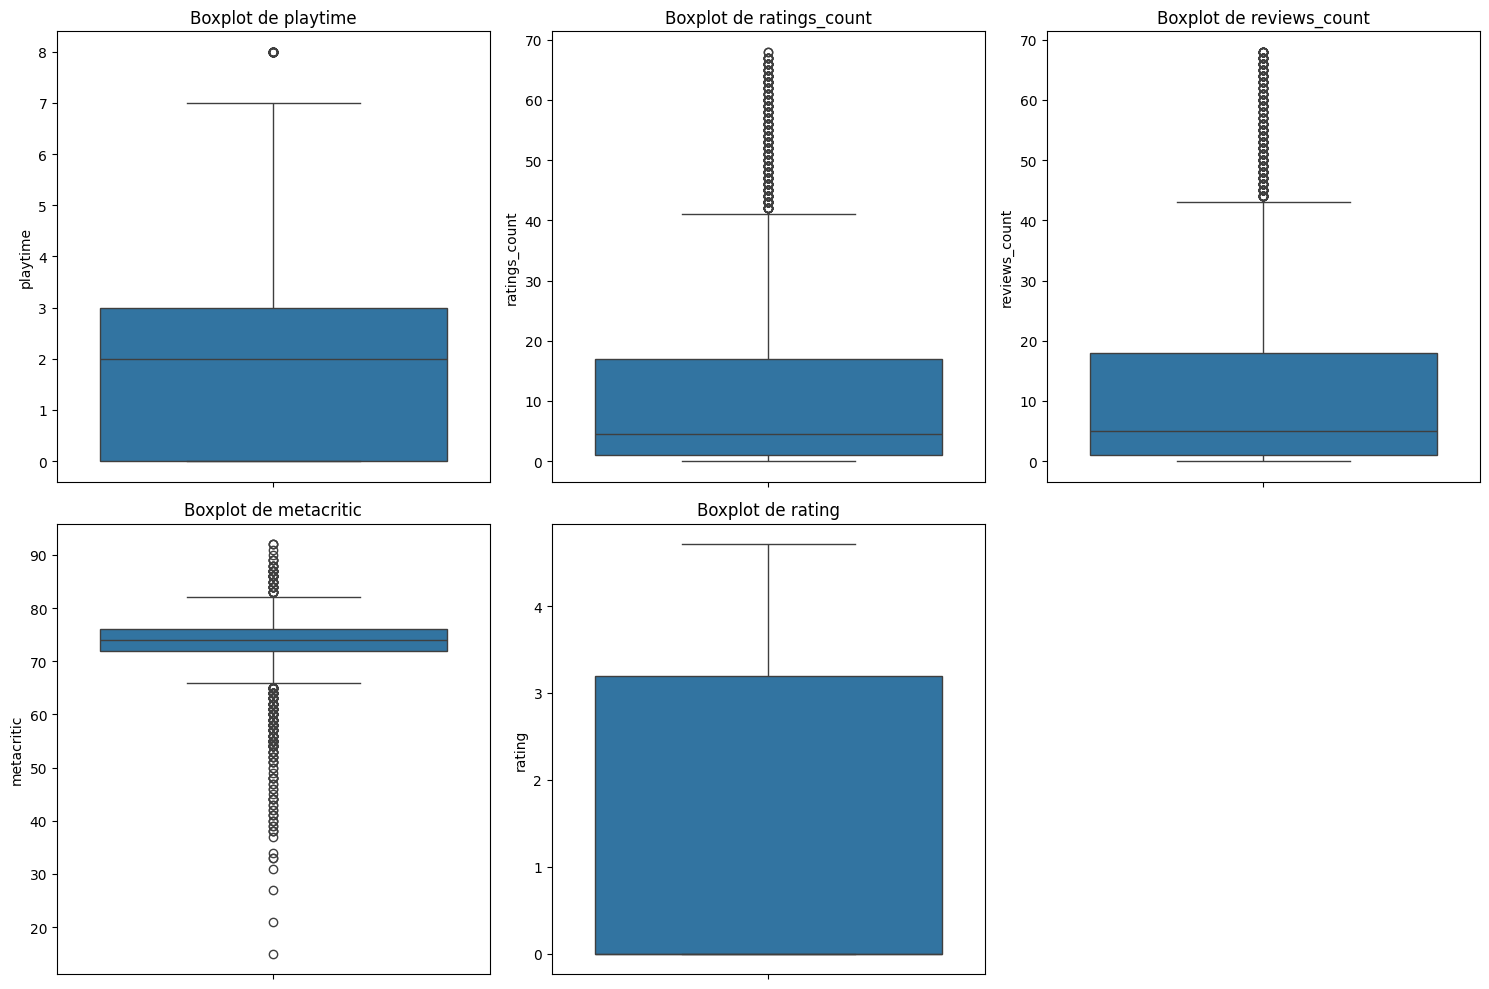

In [31]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuci√≥n de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


# Violin para visualizar mejor la distribucion

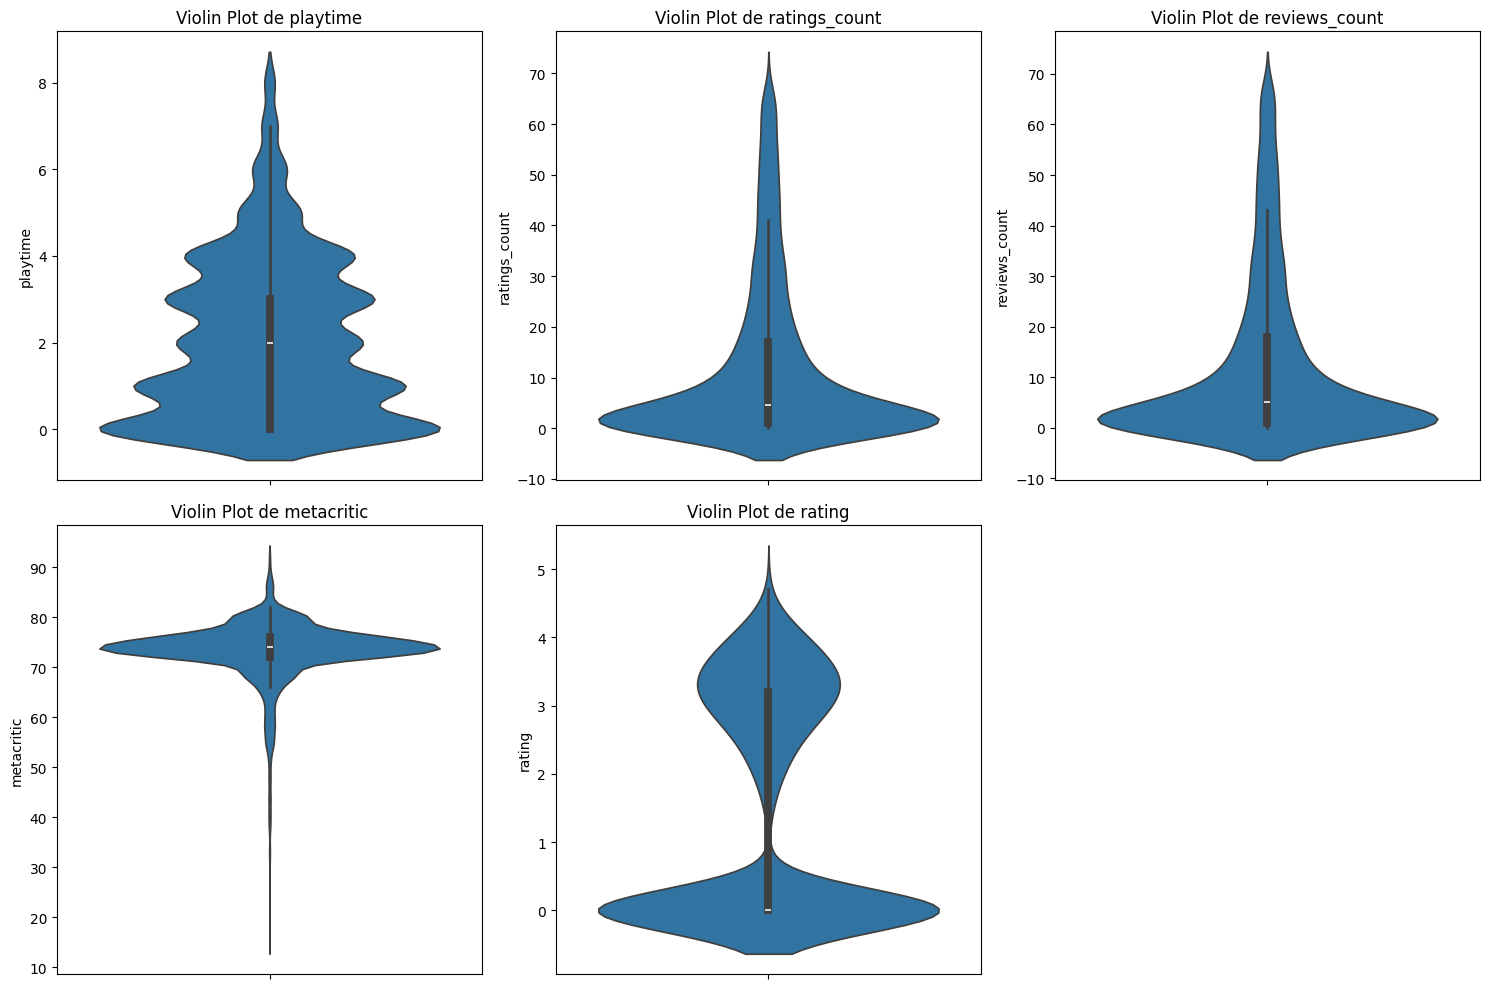

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.violinplot(y=df[col])
    plt.title(f'Violin Plot de {col}')
plt.tight_layout()
plt.show()


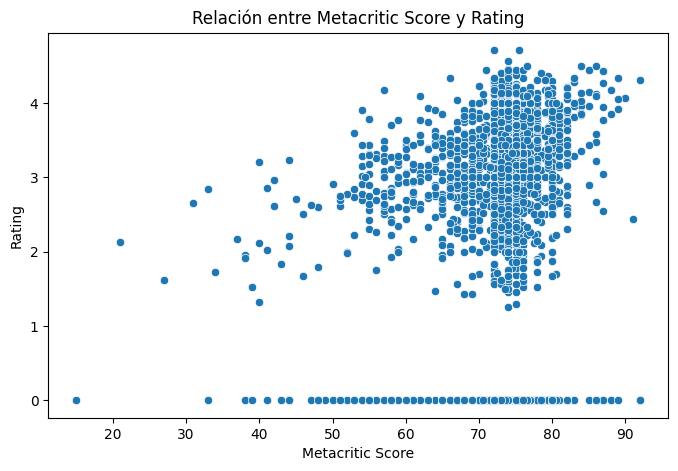

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['metacritic'], y=df['rating'])
plt.title("Relaci√≥n entre Metacritic Score y Rating")
plt.xlabel("Metacritic Score")
plt.ylabel("Rating")
plt.show()


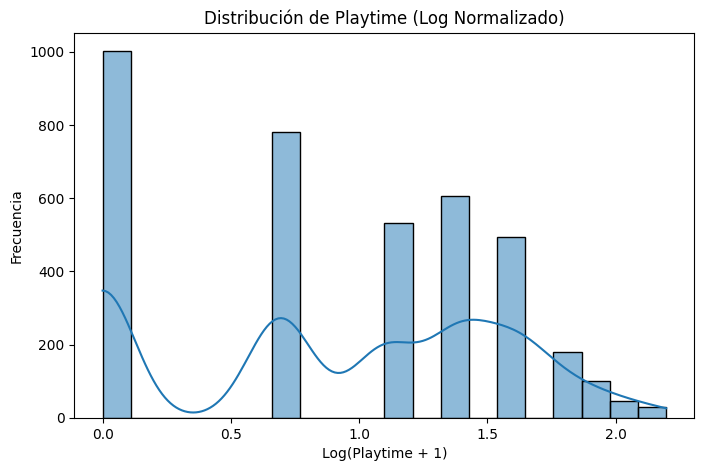

In [34]:
# Normalizaci√≥n logar√≠tmica de playtime
plt.figure(figsize=(8, 5))
df['playtime_log'] = np.log1p(df['playtime'])
sns.histplot(df['playtime_log'], bins=20, kde=True)
plt.title("Distribuci√≥n de Playtime (Log Normalizado)")
plt.xlabel("Log(Playtime + 1)")
plt.ylabel("Frecuencia")
plt.show()


## Detencion de outliers

In [35]:
def detect_outliers(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_summary[col] = outlier_count
    return pd.DataFrame(outlier_summary.items(), columns=['Variable', 'Outliers'])

outlier_df = detect_outliers(df, numeric_cols)
print(outlier_df)

        Variable  Outliers
0       playtime        30
1  ratings_count       330
2  reviews_count       316
3     metacritic       309
4         rating         0


### Matriz de correlacion con cluster

<Figure size 1200x800 with 0 Axes>

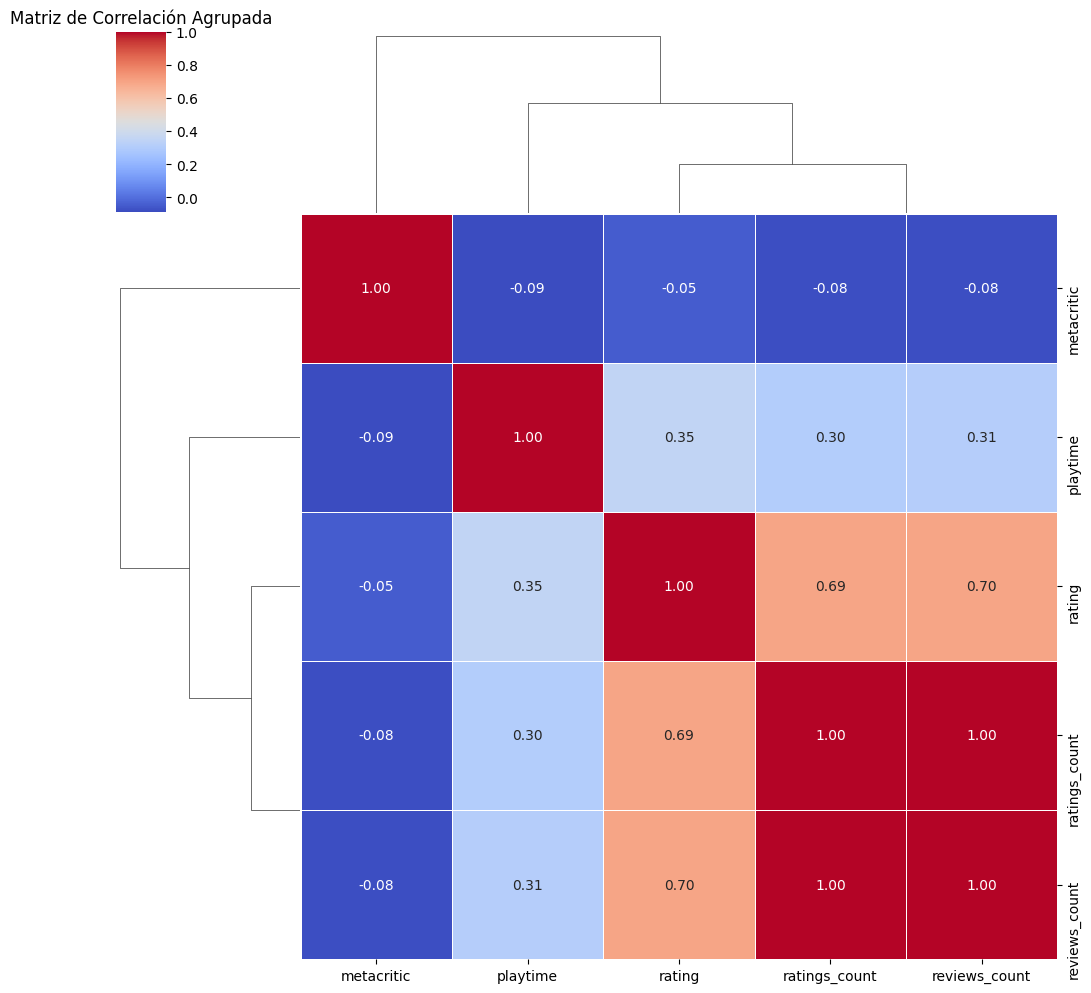

In [36]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.clustermap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaci√≥n Agrupada")
plt.show()

# **¬øQu√© observar en el gr√°fico?**
- **Variables altamente correlacionadas (positivamente)**: Si ves dos variables juntas con un color rojo fuerte, significa que tienen una fuerte relaci√≥n lineal. Ejemplo: si `metacritic` y `rating` tienen una alta correlaci√≥n, significa que los juegos con mejor puntaje en Metacritic tienden a tener mejores calificaciones de los usuarios.
- **Variables con correlaci√≥n negativa**: Si hay pares de variables con un color azul intenso, significa que est√°n inversamente relacionadas. Por ejemplo, si `playtime` tuviera una fuerte correlaci√≥n negativa con `rating`, significar√≠a que los juegos con m√°s horas de juego tienden a tener peores calificaciones.
---
## **Conclusi√≥n**
- Este gr√°fico es √∫til para identificar **relaciones fuertes** entre variables y posibles problemas de **multicolinealidad**, lo cual es importante en modelos de Machine Learning.
- Las variables agrupadas pueden representar **factores similares**, lo que puede ayudar a reducir la dimensionalidad del an√°lisis.
- Si existen variables con correlaciones extremadamente altas (cercanas a **1** o **-1**), puede ser recomendable eliminar una de ellas para evitar redundancias en el modelo.



# Distribuci√≥n de juegos por a√±o de lanzamiento

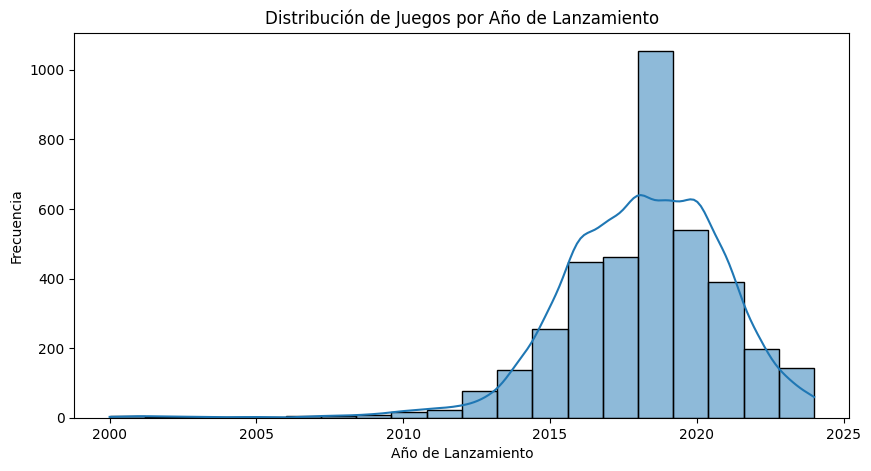

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'].dropna(), bins=20, kde=True)
plt.title("Distribuci√≥n de Juegos por A√±o de Lanzamiento")
plt.xlabel("A√±o de Lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

## Variables categoricas

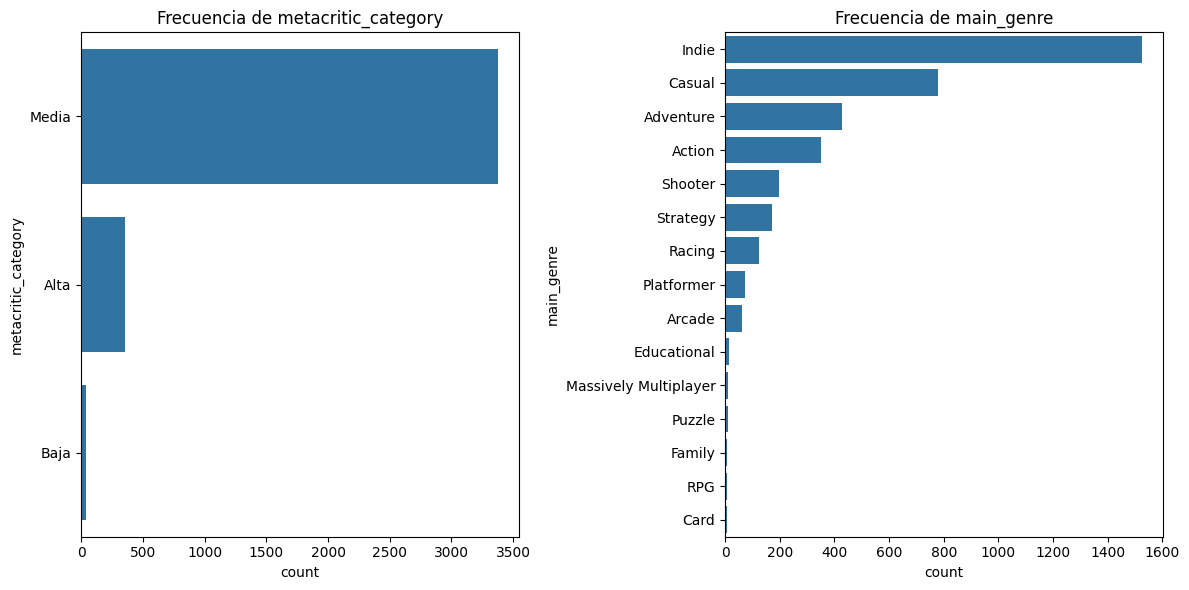

In [38]:
categorical_cols = ['metacritic_category', 'main_genre']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
plt.tight_layout()
plt.show()


## Interpretaci√≥n del Gr√°fico
## Para metacritic_category:
- Se puede observar la cantidad de juegos en cada categor√≠a de Metacritic (por ejemplo, "Excelente", "Bueno", "Regular", etc.).
- Si una categor√≠a tiene una frecuencia mucho mayor que las dem√°s, podr√≠a indicar que la mayor√≠a de los juegos se agrupan en un solo rango de puntuaci√≥n.
## Para main_genre:
- Se visualiza la distribuci√≥n de los g√©neros principales de los juegos.
- Los g√©neros con mayor frecuencia indican qu√© tipos de juegos predominan en el dataset.
- Si un g√©nero tiene una presencia muy baja, podr√≠a representar un nicho menos explorado en la industria.

## Relacion entre ambas variables

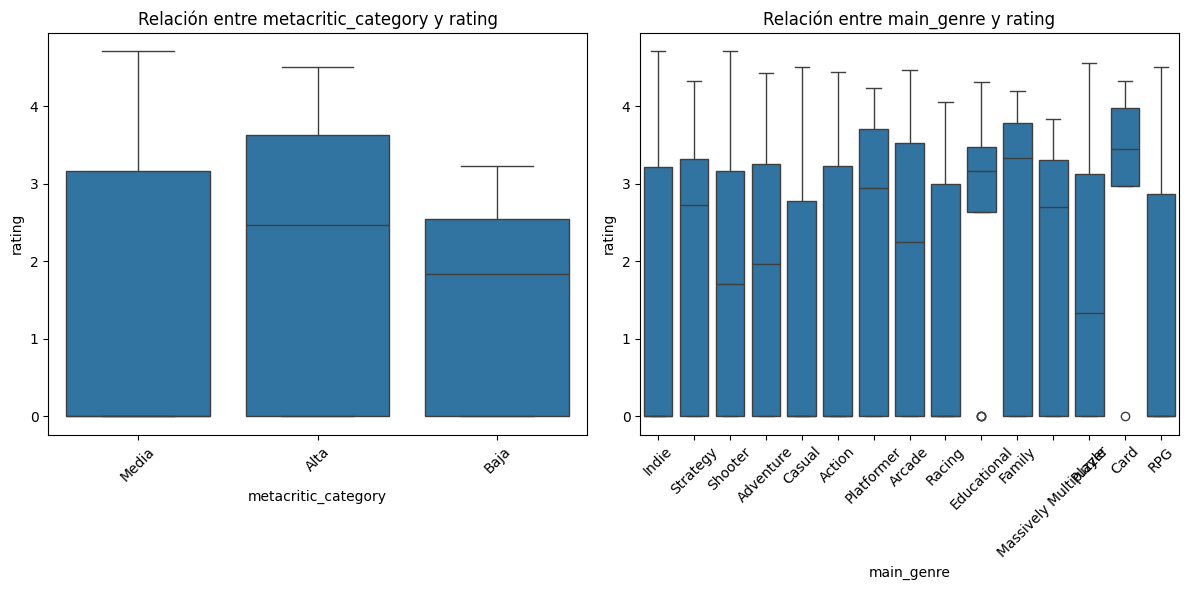

In [39]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.boxplot(x=df[col], y=df['rating'])
    plt.title(f'Relaci√≥n entre {col} y rating')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Interpretaci√≥n del Gr√°fico**
El gr√°fico de **boxplot** muestra la relaci√≥n entre las variables categ√≥ricas (`metacritic_category` y `main_genre`) y la variable num√©rica `rating`. 

1. **Para `metacritic_category`**:
   - Permite observar si los juegos con diferentes categor√≠as de Metacritic tienen diferencias significativas en sus calificaciones (`rating`).
   - Si las medianas de los grupos son similares, significa que la categor√≠a de Metacritic no influye mucho en el `rating` de los usuarios.
   - Si hay mucha variabilidad dentro de una categor√≠a, podr√≠a indicar que los usuarios no siempre coinciden con la evaluaci√≥n de Metacritic.

2. **Para `main_genre`**:
   - Muestra la distribuci√≥n de calificaciones (`rating`) seg√∫n el g√©nero principal del juego.
   - Si algunos g√©neros tienen una mediana de `rating` m√°s alta que otros, significa que los jugadores tienden a calificar mejor esos g√©neros.
   - La presencia de **outliers** indica que algunos juegos dentro de un g√©nero reciben calificaciones significativamente diferentes al resto.

---

## **Conclusi√≥n**
‚úÖ El **boxplot** nos ayuda a entender c√≥mo var√≠a el `rating` de los juegos en funci√≥n de su g√©nero y su clasificaci√≥n en Metacritic.  
‚úÖ Nos permite identificar **tendencias y patrones** en la calificaci√≥n de los usuarios con respecto a distintas categor√≠as.  
‚úÖ Si observamos una gran diferencia en las medianas entre categor√≠as, podr√≠amos concluir que la variable categ√≥rica tiene un impacto significativo en la calificaci√≥n.  
‚úÖ En caso de alta dispersi√≥n dentro de una categor√≠a, podr√≠a indicar que hay **factores adicionales** influyendo en el `rating`, m√°s all√° de la clasificaci√≥n de Metacritic o el g√©nero del juego.  

 


# An√°lisis Bivariado - Dispersi√≥n entre variables num√©ricas

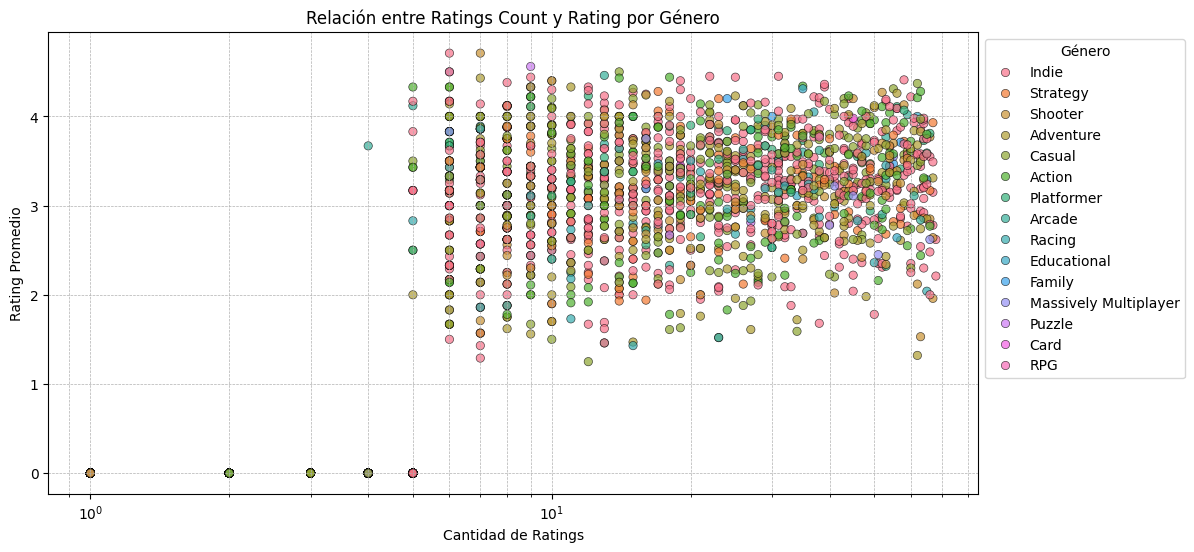

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['ratings_count'], y=df['rating'], hue=df['main_genre'], alpha=0.7, edgecolor='k')
plt.xscale("log")  
plt.xlabel("Cantidad de Ratings")
plt.ylabel("Rating Promedio")
plt.title("Relaci√≥n entre Ratings Count y Rating por G√©nero")
plt.legend(title="G√©nero", bbox_to_anchor=(1, 1))
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## **Interpretaci√≥n del Gr√°fico**
Este **gr√°fico de dispersi√≥n** muestra la relaci√≥n entre la **cantidad de calificaciones (`ratings_count`)** y el **rating promedio (`rating`)** de los juegos, diferenciando los puntos por g√©nero (`main_genre`).

1. **Distribuci√≥n de los datos**:
   - Se observa que la mayor√≠a de los juegos tienen un n√∫mero bajo de calificaciones, con solo unos pocos que han recibido muchas.
   - Debido a que el eje **X** est√° en escala logar√≠tmica (`plt.xscale("log")`), podemos ver mejor la distribuci√≥n de los juegos con **pocos y muchos ratings**.

2. **Relaci√≥n entre `ratings_count` y `rating`**:
   - Si se observa una tendencia donde los juegos con m√°s calificaciones tienen valores de `rating` m√°s estables, esto podr√≠a indicar que las calificaciones de los usuarios se estabilizan con un mayor n√∫mero de votos.
   - Si hay alta dispersi√≥n en juegos con pocos `ratings_count`, podr√≠a significar que los juegos con menos votos tienen una mayor variabilidad en sus calificaciones.

3. **Impacto del G√©nero (`main_genre`)**:
   - Los diferentes colores en el gr√°fico representan distintos g√©neros de juegos.
   - Si ciertos g√©neros tienden a acumular m√°s ratings y mantener un **rating** alto o bajo, esto podr√≠a indicar una **preferencia de los usuarios por ciertos g√©neros**.
   - Algunos g√©neros pueden mostrar una mayor variabilidad en sus ratings, lo que indicar√≠a que son m√°s polarizantes entre los jugadores.

---

## **Conclusi√≥n**
‚úÖ **Los juegos con m√°s `ratings_count` tienden a tener calificaciones m√°s estables**, lo que sugiere que las calificaciones de los usuarios se promedian mejor con m√°s votos.  
‚úÖ **Los juegos con pocos `ratings_count` pueden tener una mayor variabilidad en su `rating`**, lo que indica que pueden estar influenciados por pocas opiniones extremas.  
‚úÖ **Algunos g√©neros pueden tener m√°s juegos con muchos ratings**, lo que sugiere que son m√°s populares entre los jugadores.  
‚úÖ **El uso de escala logar√≠tmica permite visualizar mejor la tendencia**, evitando que los juegos con pocos ratings dominen la gr√°fica.  

Este an√°lisis es √∫til para entender c√≥mo la cantidad de calificaciones puede influir en la percepci√≥n general de un juego y c√≥mo diferentes g√©neros pueden atraer m√°s interacci√≥n de los jugadores. üöÄ  


# An√°lisis de Tendencias Temporales

C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3743297377.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='release_year', y='rating', hue='main_genre', ci=None, marker='o')


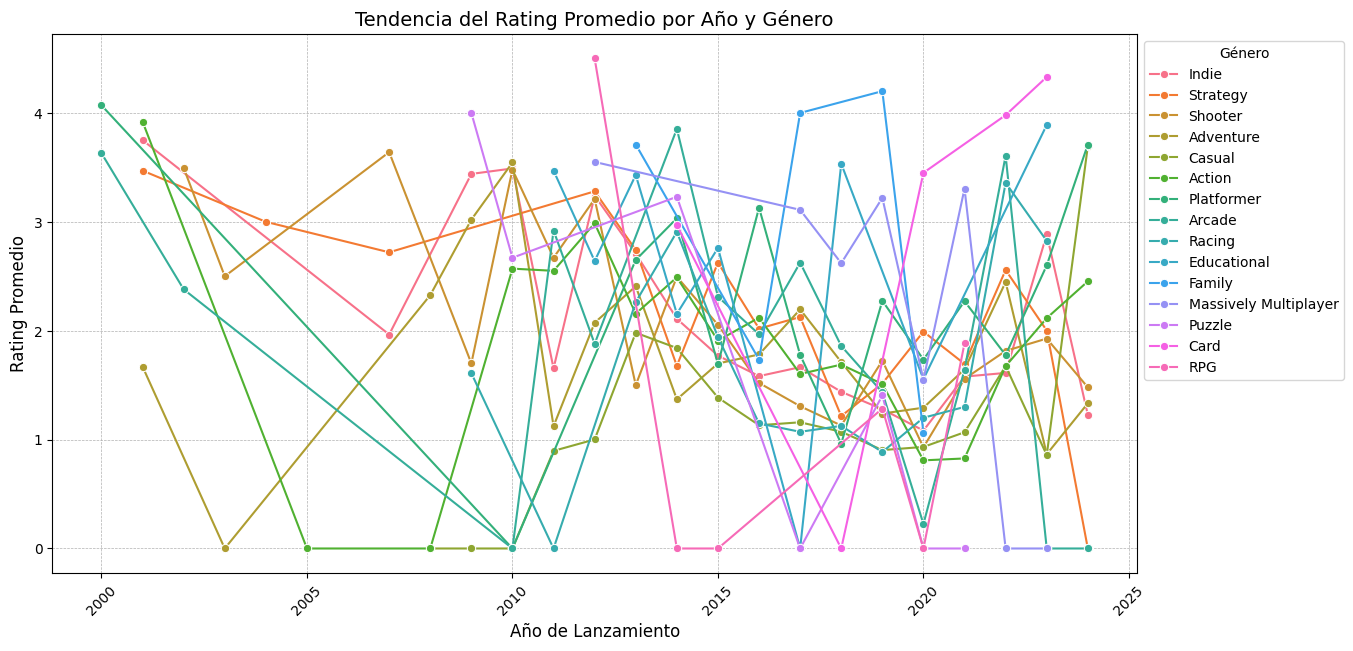

In [ ]:
df['release_year'] = pd.to_datetime(df['released']).dt.year
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='release_year', y='rating', hue='main_genre', ci=None, marker='o')
plt.title("Tendencia del Rating Promedio por A√±o y G√©nero", fontsize=14)
plt.xlabel("A√±o de Lanzamiento", fontsize=12)
plt.ylabel("Rating Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="G√©nero", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


# **Interpretaci√≥n del Gr√°fico**
Este gr√°fico de l√≠neas muestra la **tendencia del rating promedio** de los videojuegos a lo largo de los a√±os, diferenciando por g√©nero (`main_genre`). 

1. **Eje X (`release_year`)**: Representa el a√±o de lanzamiento de los videojuegos.
2. **Eje Y (`rating`)**: Representa la calificaci√≥n promedio de los juegos lanzados en cada a√±o.
3. **L√≠neas de colores**: Cada l√≠nea representa un g√©nero de videojuegos, permitiendo comparar la evoluci√≥n de las calificaciones a lo largo del tiempo.
4. **Puntos (`marker='o'`)**: Indican los valores espec√≠ficos del rating en cada a√±o.
5. **Sin intervalo de confianza (`ci=None`)**: Se muestra solo la l√≠nea de tendencia sin sombreado de variabilidad.

### **¬øQu√© informaci√≥n nos da este gr√°fico?**
- **Variabilidad de ratings a lo largo del tiempo**: Permite ver si la calificaci√≥n promedio de los juegos ha aumentado, disminuido o se ha mantenido estable en los distintos a√±os.
- **Comparaci√≥n entre g√©neros**: Nos ayuda a identificar si ciertos g√©neros han mantenido un alto puntaje a lo largo del tiempo o si han sufrido cambios dr√°sticos en su evaluaci√≥n.
- **Picos y ca√≠das**: Si hay a√±os donde los ratings suben o bajan significativamente, podr√≠a indicar tendencias en la industria del gaming (por ejemplo, la popularidad de ciertos g√©neros en ciertas √©pocas).
- **G√©neros con mejor o peor recepci√≥n**: Al observar l√≠neas consistentemente m√°s altas o bajas, podemos identificar qu√© g√©neros suelen recibir mejores calificaciones de los jugadores.

---

# **Conclusi√≥n**
‚úÖ **Permite analizar la evoluci√≥n de las calificaciones de los videojuegos a lo largo del tiempo**.  
‚úÖ **Identifica tendencias por g√©nero**, ayudando a comprender qu√© tipos de juegos han sido mejor recibidos en diferentes √©pocas.  
‚úÖ **Ayuda a detectar posibles patrones de la industria** como la popularidad creciente o decreciente de ciertos g√©neros en ciertos per√≠odos.  
‚úÖ **Si algunas l√≠neas muestran grandes variaciones en ciertos a√±os**, podr√≠a ser relevante investigar si esos cambios se deben a eventos clave en la industria del gaming.  


# Comparaci√≥n de Distribuciones Entre Categor√≠as

C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is 

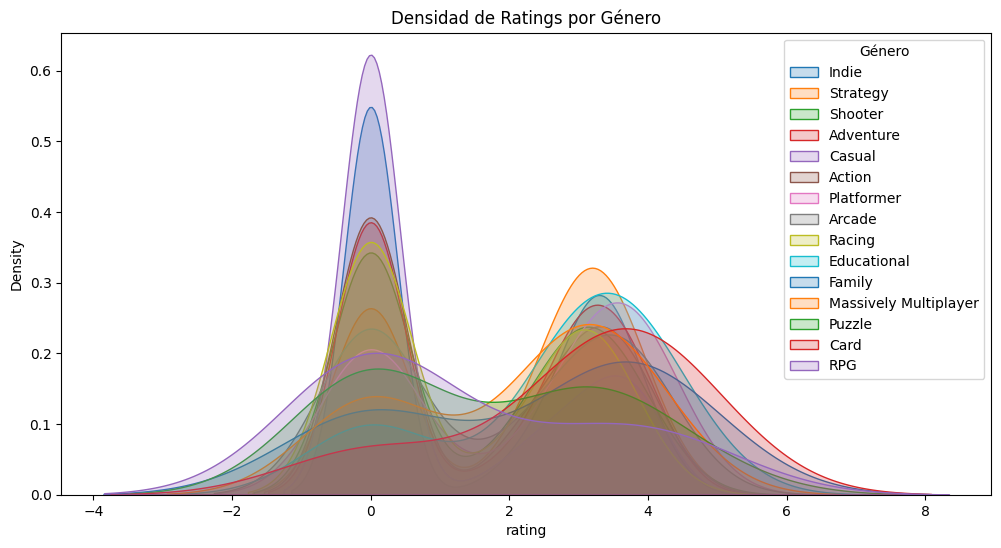

In [ ]:
plt.figure(figsize=(12, 6))
for genre in df['main_genre'].unique():
    sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
plt.title("Densidad de Ratings por G√©nero")
plt.legend(title="G√©nero")
plt.show()

# **Interpretaci√≥n del Gr√°fico**
Este gr√°fico de **densidad de ratings por g√©nero** utiliza **Kernel Density Estimation (KDE)** para visualizar la distribuci√≥n de calificaciones (`rating`) de los videojuegos seg√∫n su g√©nero (`main_genre`).

### **¬øQu√© representa el gr√°fico?**
1. **Eje X (`rating`)**: Representa la calificaci√≥n de los videojuegos.
2. **Eje Y (densidad estimada)**: Representa la proporci√≥n de juegos dentro de cada g√©nero con un determinado `rating`.
3. **L√≠neas de colores**: Cada curva representa la distribuci√≥n de calificaciones para un g√©nero espec√≠fico.
4. **Sombreado (`shade=True`)**: Resalta el √°rea bajo la curva para una mejor visualizaci√≥n de la densidad.

### **¬øC√≥mo interpretar las curvas?**
- **Picos altos**: Indican que hay una gran cantidad de juegos de ese g√©nero con un `rating` espec√≠fico.
- **Distribuci√≥n ancha**: Sugiere que los ratings de los juegos en ese g√©nero var√≠an mucho.
- **Distribuci√≥n estrecha**: Indica que la mayor√≠a de los juegos en ese g√©nero tienen calificaciones similares.
- **Si una curva est√° desplazada hacia la derecha**, significa que los juegos de ese g√©nero tienden a recibir calificaciones m√°s altas.
- **Si est√° desplazada hacia la izquierda**, significa que esos juegos suelen tener calificaciones m√°s bajas.

---

# **Conclusi√≥n**
‚úÖ **Permite visualizar c√≥mo se distribuyen los ratings entre los diferentes g√©neros de videojuegos**.  
‚úÖ **Identifica qu√© g√©neros suelen recibir mejores o peores calificaciones** en promedio.  
‚úÖ **Detecta variabilidad dentro de cada g√©nero**, mostrando si algunos g√©neros tienen una distribuci√≥n uniforme de calificaciones o si la mayor√≠a de sus juegos reciben puntuaciones similares.  
‚úÖ **Si las distribuciones de algunos g√©neros se solapan**, indica que esos g√©neros tienen una calificaci√≥n similar y no hay una diferencia significativa en la percepci√≥n de los jugadores.  

